In [1]:
import os, sys, warnings
from pathlib import Path

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

parent_dir = Path().resolve().parents[0]
sys.path.append(str(parent_dir))

In [2]:
from src.utils.utils import load_data, make_synthetic_data, train_and_evaluate_model
from src.gan.models import NetworkAnomalyDetector, DeeperNetworkAnomalyDetector
from src.gan.data_augmentors import CTGANAugmentor, TVAEAugmentor

In [3]:
datasets = ["NF-ToN-IoT", "UNSW-NB15"]
target_variable = "Attack"

X_train_NF, X_test_NF, y_train_NF, y_test_NF = load_data(datasets[0], target_variable)
X_train_UNSW, X_test_UNSW, y_train_UNSW, y_test_UNSW = load_data(datasets[1], target_variable)

In [4]:
augmentor_ctgan = TVAEAugmentor()
augmentor_ctgan.minority_threshold = 20000

In [5]:
model_type = DeeperNetworkAnomalyDetector

In [6]:
synthetic_data_NF = make_synthetic_data(
    X_train_NF,
    y_train_NF,
    X_test_NF,
    y_test_NF,
    target_variable,
    dataset=datasets[0],
    gan_augmentor=augmentor_ctgan)

Generating synthetic data for category: scanning
Generating synthetic data for category: backdoor
Generating synthetic data for category: dos
Generating synthetic data for category: mitm
Generating synthetic data for category: ransomware
Size of synthetic data: (54963, 11)


In [7]:
import pandas as pd
from src.ids.train_ids import run_ids_training
datasets = ["NF-ToN-IoT", "UNSW-NB15"]
model_choices = ["simple", "deeper"]
cur_dataset = datasets[0]
cur_model = model_choices[1]

# NF-ToN-IoT Testing

In [8]:
# # NF-ToN-IoT Synthetic Data Only Training
# cur_dataset = datasets[0]
# cur_model = model_choices[1]

# run_ids_training(
#     # x_real=f"../data/processed/{cur_dataset}/X_train.csv",
#     # y_real=f"../data/processed/{cur_dataset}/y_train.csv",
#     x_real=None,
#     y_real=None,
#     synthetic_path=f"../data/synthetic/{cur_dataset}/synthetic_data.csv",
#     x_test=f"../data/processed/{cur_dataset}/X_test.csv",
#     y_test=f"../data/processed/{cur_dataset}/y_test.csv",
#     model_out=f"../experiments/ids_models/random_forest_{cur_dataset}.pkl",
#     results_dir=f"../experiments/results/{cur_dataset}/results/simple/",
#     model=cur_model
# )


Classes: ['injection' 'ddos' 'scanning' 'benign' 'xss' 'dos' 'password' 'backdoor'
 'mitm' 'ransomware'], Test Classes: ['injection' 'ddos' 'benign' 'password' 'dos' 'xss' 'backdoor' 'scanning'
 'mitm' 'ransomware']
number of classes: 10, Classes: [0 1 2 3 4 5 6 7 8 9]
Loss function: Cross Entropy Loss
Epoch 1/50, Loss: 0.9097
Epoch 5/50, Loss: 0.8365
Epoch 10/50, Loss: 0.8027
Epoch 15/50, Loss: 0.7934
Epoch 20/50, Loss: 0.7879
Epoch 25/50, Loss: 0.7832
Epoch 30/50, Loss: 0.7801
Epoch 35/50, Loss: 0.7799
Epoch 40/50, Loss: 0.7786
Epoch 45/50, Loss: 0.7774
Epoch 50/50, Loss: 0.7751

Test Accuracy: 67.75%

Classification Report:
              precision    recall  f1-score   support

    backdoor       1.00      0.98      0.99      3418
      benign       0.98      0.98      0.98     39791
        ddos       0.71      0.64      0.68     39421
         dos       1.00      0.00      0.00      3489
   injection       0.60      0.94      0.73     91785
        mitm       0.50      0.15      0

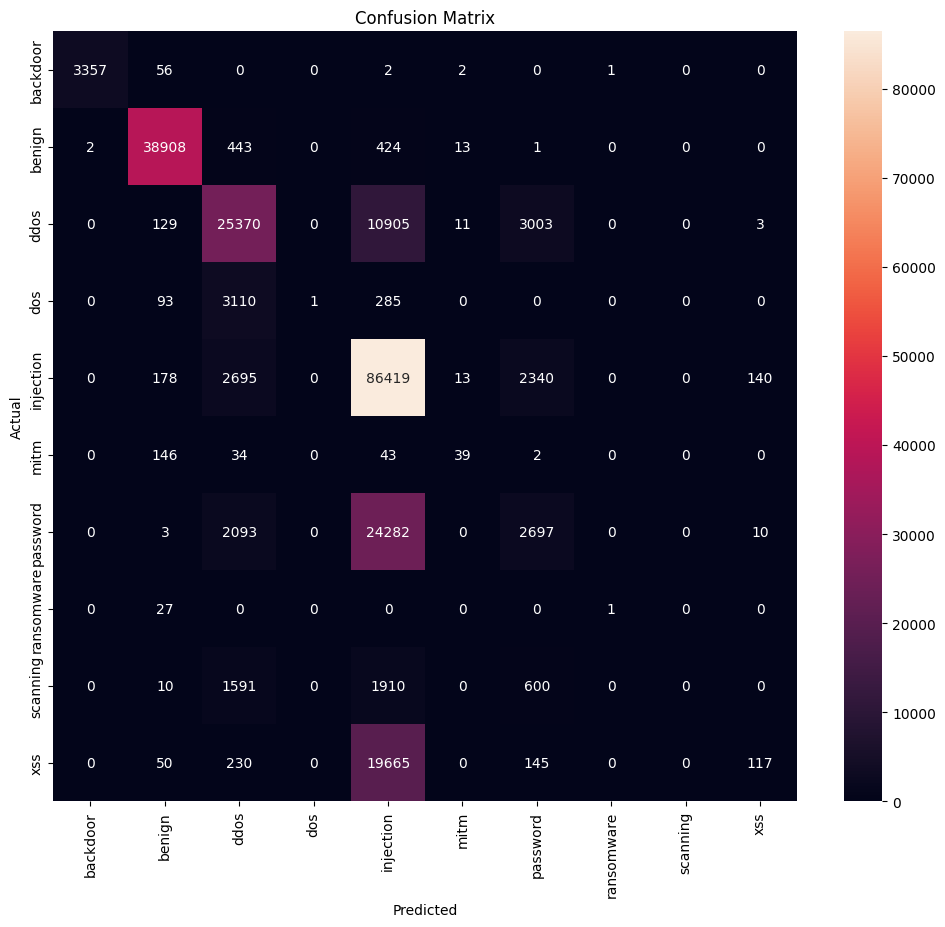

AttributeError: 'tuple' object has no attribute 'state_dict'

In [ ]:
# NF-ToN-IoT Real Data Only Training
cur_dataset = datasets[0]
cur_model = model_choices[1]

run_ids_training(
    x_real=f"../data/processed/{cur_dataset}/X_train.csv",
    y_real=f"../data/processed/{cur_dataset}/y_train.csv",
    synthetic_path=None,
    x_test=f"../data/processed/{cur_dataset}/X_test.csv",
    y_test=f"../data/processed/{cur_dataset}/y_test.csv",
    model_out=f"../experiments/ids_models/real_{cur_dataset}.pkl",
    results_dir=f"../experiments/results/{cur_dataset}/results/real/",
    model=cur_model
)

In [ ]:
# NF-ToN-IoT Real and Syntthetic Data Training
cur_dataset = datasets[0]
cur_model = model_choices[1]

run_ids_training(
    x_real=f"../data/processed/{cur_dataset}/X_train.csv",
    y_real=f"../data/processed/{cur_dataset}/y_train.csv",
    synthetic_path=f"../data/synthetic/{cur_dataset}/synthetic_data.csv",
    x_test=f"../data/processed/{cur_dataset}/X_test.csv",
    y_test=f"../data/processed/{cur_dataset}/y_test.csv",
    model_out=f"../experiments/ids_models/real_synthetic_{cur_dataset}.pkl",
    results_dir=f"../experiments/results/{cur_dataset}/results/real_synthetic/",
    model=cur_model
)


# UNSW-NB15

In [ ]:
synthetic_data_UNSW = make_synthetic_data(
    X_train_UNSW,
    y_train_UNSW,
    X_test_UNSW,
    y_test_UNSW,
    target_variable,
    dataset=datasets[1],
    gan_augmentor=augmentor_ctgan)

Generating synthetic data for category: Fuzzers


KeyboardInterrupt: 

In [ ]:
# # UNSW-NB15 Synthetic Data Only Training
# cur_dataset = datasets[1]
# cur_model = model_choices[1]

# run_ids_training(
#     # x_real=f"../data/processed/{cur_dataset}/X_train.csv",
#     # y_real=f"../data/processed/{cur_dataset}/y_train.csv",
#     x_real=None,
#     y_real=None,
#     synthetic_path=f"../data/synthetic/{cur_dataset}/synthetic_data.csv",
#     x_test=f"../data/processed/{cur_dataset}/X_test.csv",
#     y_test=f"../data/processed/{cur_dataset}/y_test.csv",
#     model_out=f"../experiments/ids_models/random_forest_{cur_dataset}.pkl",
#     results_dir=f"../experiments/results/{cur_dataset}/results/simple/",
#     model=cur_model
# )


In [ ]:
# UNSW-NB15 Real Data Only Training
cur_dataset = datasets[1]
cur_model = model_choices[1]

run_ids_training(
    x_real=f"../data/processed/{cur_dataset}/X_train.csv",
    y_real=f"../data/processed/{cur_dataset}/y_train.csv",
    synthetic_path=None,
    x_test=f"../data/processed/{cur_dataset}/X_test.csv",
    y_test=f"../data/processed/{cur_dataset}/y_test.csv",
    model_out=f"../experiments/ids_models/real_{cur_dataset}.pkl",
    results_dir=f"../experiments/results/{cur_dataset}/results/real/",
    model=cur_model
)

In [ ]:
# UNSW-NB15 Real and Syntthetic Data Training
cur_dataset = datasets[1]
cur_model = model_choices[1]

run_ids_training(
    x_real=f"../data/processed/{cur_dataset}/X_train.csv",
    y_real=f"../data/processed/{cur_dataset}/y_train.csv",
    synthetic_path=f"../data/synthetic/{cur_dataset}/synthetic_data.csv",
    x_test=f"../data/processed/{cur_dataset}/X_test.csv",
    y_test=f"../data/processed/{cur_dataset}/y_test.csv",
    model_out=f"../experiments/ids_models/real_synthetic_{cur_dataset}.pkl",
    results_dir=f"../experiments/results/{cur_dataset}/results/real_synthetic/",
    model=cur_model
)



🚀 Trial 1/30:
Model: WiderDeeperNetworkAnomalyDetector, Epochs: 50, Batch Size: 256, LR: 0.001
number of classes: 10, Classes: [0 1 2 3 4 5 6 7 8 9]
Loss function: Cross Entropy Loss
Epoch 1/50, Loss: 0.9403
Epoch 5/50, Loss: 0.8607
Epoch 10/50, Loss: 0.8384
Epoch 15/50, Loss: 0.8242
Epoch 20/50, Loss: 0.8178
Epoch 25/50, Loss: 0.8128
Epoch 30/50, Loss: 0.8069
Epoch 35/50, Loss: 0.8042
Epoch 40/50, Loss: 0.8024
Epoch 45/50, Loss: 0.7995
Epoch 50/50, Loss: 0.7976

Test Accuracy: 62.91%

Classification Report:
              precision    recall  f1-score   support

    backdoor       0.88      0.98      0.93      3418
      benign       0.82      0.96      0.88     39791
        ddos       0.60      0.58      0.59     39421
         dos       0.00      0.00      0.00      3489
   injection       0.59      0.88      0.71     91785
        mitm       0.02      0.31      0.03       264
    password       0.00      0.00      0.00     29085
  ransomware       0.10      0.68      0.18        2

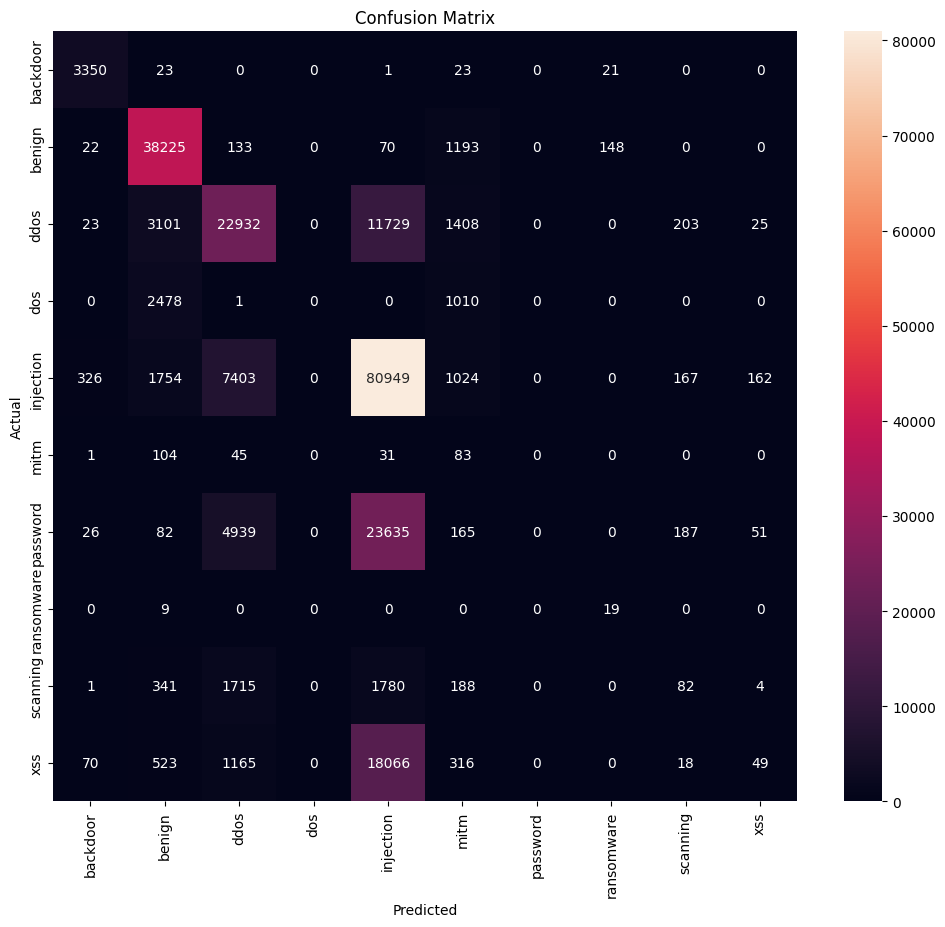


🚀 Trial 2/30:
Model: DeeperNetworkAnomalyDetector, Epochs: 30, Batch Size: 32, LR: 0.0001
number of classes: 10, Classes: [0 1 2 3 4 5 6 7 8 9]
Loss function: Cross Entropy Loss
Epoch 1/30, Loss: 1.0006
Epoch 5/30, Loss: 0.8741
Epoch 10/30, Loss: 0.8411
Epoch 15/30, Loss: 0.8273
Epoch 20/30, Loss: 0.8184
Epoch 25/30, Loss: 0.8111
Epoch 30/30, Loss: 0.8044

Test Accuracy: 66.02%

Classification Report:
              precision    recall  f1-score   support

    backdoor       1.00      0.98      0.99      3418
      benign       0.99      0.96      0.98     39791
        ddos       0.61      0.63      0.62     39421
         dos       0.30      0.45      0.36      3489
   injection       0.59      0.92      0.72     91785
        mitm       0.17      0.17      0.17       264
    password       0.34      0.00      0.00     29085
  ransomware       0.10      0.68      0.17        28
    scanning       0.00      0.00      0.00      4111
         xss       0.00      0.00      0.00     20207

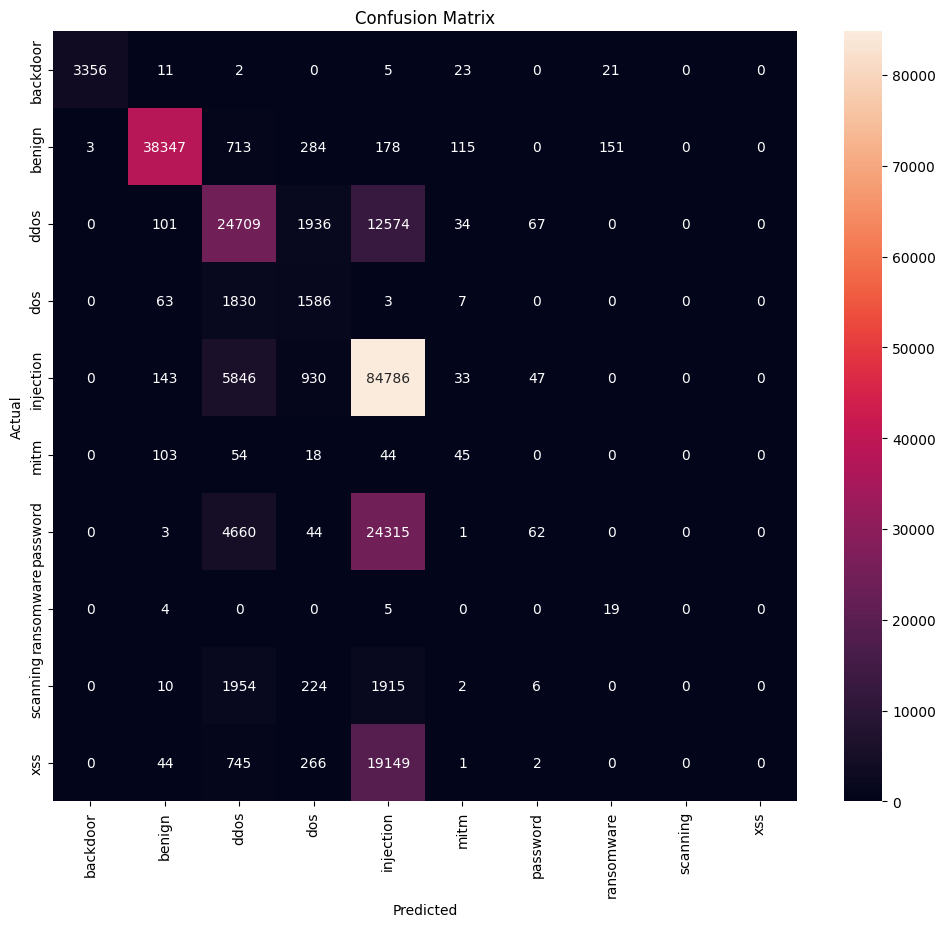


🚀 Trial 3/30:
Model: DeeperNetworkAnomalyDetector, Epochs: 20, Batch Size: 64, LR: 0.0005
number of classes: 10, Classes: [0 1 2 3 4 5 6 7 8 9]
Loss function: Cross Entropy Loss
Epoch 1/20, Loss: 0.9344
Epoch 5/20, Loss: 0.8344
Epoch 10/20, Loss: 0.7989
Epoch 15/20, Loss: 0.7841
Epoch 20/20, Loss: 0.7714

Test Accuracy: 67.22%

Classification Report:
              precision    recall  f1-score   support

    backdoor       1.00      0.99      0.99      3418
      benign       0.99      0.96      0.97     39791
        ddos       0.71      0.62      0.67     39421
         dos       0.33      0.32      0.33      3489
   injection       0.59      0.95      0.73     91785
        mitm       0.12      0.19      0.15       264
    password       0.30      0.04      0.06     29085
  ransomware       0.10      0.68      0.18        28
    scanning       0.17      0.03      0.05      4111
         xss       0.00      0.00      0.00     20207

    accuracy                           0.67    231

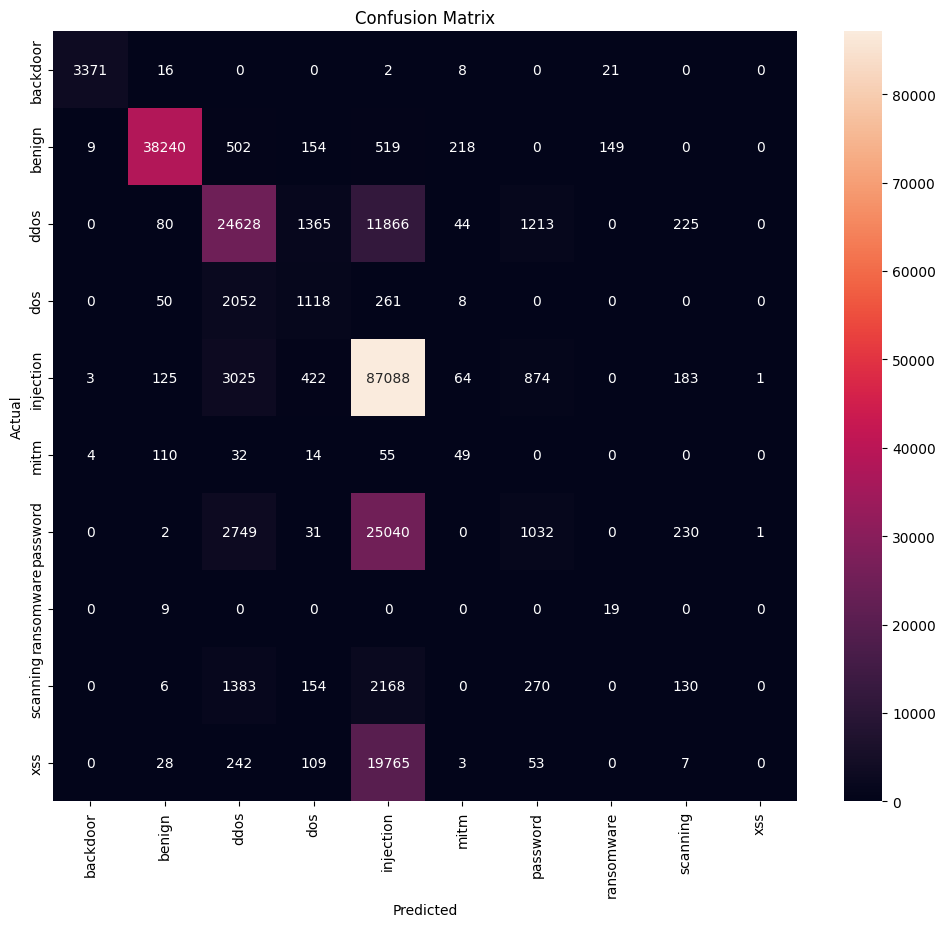


🚀 Trial 4/30:
Model: DeeperNetworkAnomalyDetector, Epochs: 50, Batch Size: 256, LR: 0.0005
number of classes: 10, Classes: [0 1 2 3 4 5 6 7 8 9]
Loss function: Cross Entropy Loss
Epoch 1/50, Loss: 0.9879
Epoch 5/50, Loss: 0.8688
Epoch 10/50, Loss: 0.8360
Epoch 15/50, Loss: 0.8165
Epoch 20/50, Loss: 0.8073
Epoch 25/50, Loss: 0.7986
Epoch 30/50, Loss: 0.7919
Epoch 35/50, Loss: 0.7865
Epoch 40/50, Loss: 0.7805
Epoch 45/50, Loss: 0.7757
Epoch 50/50, Loss: 0.7713

Test Accuracy: 67.34%

Classification Report:
              precision    recall  f1-score   support

    backdoor       1.00      0.98      0.99      3418
      benign       0.99      0.96      0.98     39791
        ddos       0.71      0.63      0.67     39421
         dos       0.32      0.28      0.30      3489
   injection       0.60      0.95      0.73     91785
        mitm       0.12      0.21      0.15       264
    password       0.31      0.05      0.09     29085
  ransomware       0.10      0.68      0.18        28
  

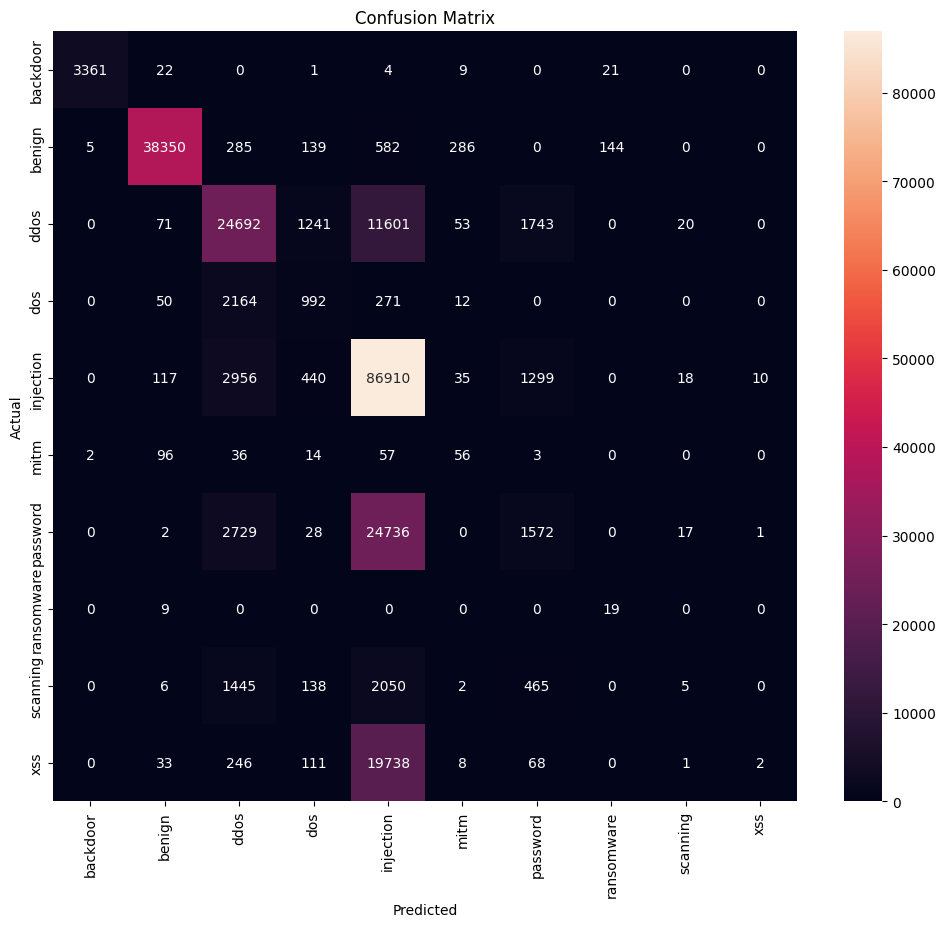


🚀 Trial 5/30:
Model: DeeperNetworkAnomalyDetector, Epochs: 20, Batch Size: 128, LR: 0.0001
number of classes: 10, Classes: [0 1 2 3 4 5 6 7 8 9]
Loss function: Cross Entropy Loss
Epoch 1/20, Loss: 1.0935
Epoch 5/20, Loss: 0.8952
Epoch 10/20, Loss: 0.8711
Epoch 15/20, Loss: 0.8568
Epoch 20/20, Loss: 0.8451

Test Accuracy: 65.13%

Classification Report:
              precision    recall  f1-score   support

    backdoor       0.99      0.98      0.99      3418
      benign       0.95      0.95      0.95     39791
        ddos       0.68      0.56      0.61     39421
         dos       0.29      0.36      0.32      3489
   injection       0.59      0.93      0.72     91785
        mitm       0.02      0.26      0.04       264
    password       0.30      0.04      0.07     29085
  ransomware       0.10      0.68      0.18        28
    scanning       0.00      0.00      0.00      4111
         xss       0.00      0.00      0.00     20207

    accuracy                           0.65    23

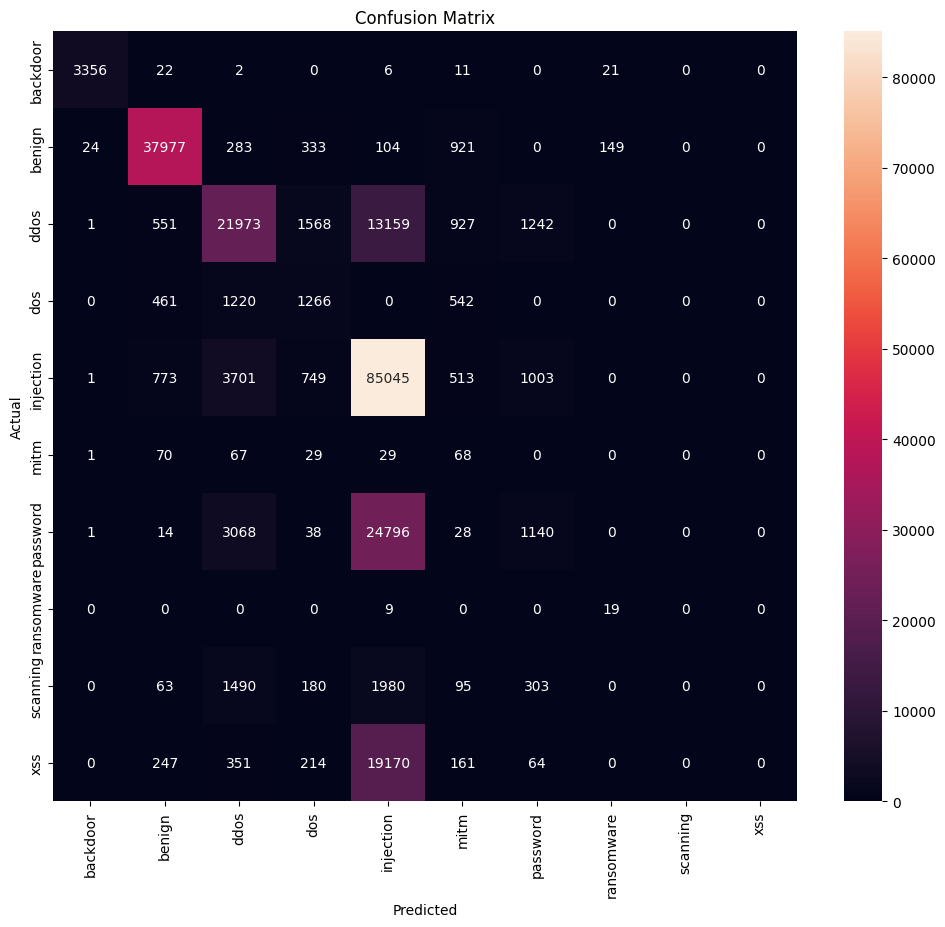


🚀 Trial 6/30:
Model: NetworkAnomalyDetector, Epochs: 100, Batch Size: 64, LR: 0.0001
number of classes: 10, Classes: [0 1 2 3 4 5 6 7 8 9]
Loss function: Cross Entropy Loss
Epoch 1/100, Loss: 1.1036
Epoch 5/100, Loss: 0.9108
Epoch 10/100, Loss: 0.8913
Epoch 15/100, Loss: 0.8785
Epoch 20/100, Loss: 0.8672
Epoch 25/100, Loss: 0.8580
Epoch 30/100, Loss: 0.8494
Epoch 35/100, Loss: 0.8414
Epoch 40/100, Loss: 0.8348
Epoch 45/100, Loss: 0.8298
Epoch 50/100, Loss: 0.8258
Epoch 55/100, Loss: 0.8224
Epoch 60/100, Loss: 0.8196
Epoch 65/100, Loss: 0.8170
Epoch 70/100, Loss: 0.8149
Epoch 75/100, Loss: 0.8127
Epoch 80/100, Loss: 0.8108
Epoch 85/100, Loss: 0.8089
Epoch 90/100, Loss: 0.8071
Epoch 95/100, Loss: 0.8055
Epoch 100/100, Loss: 0.8042

Test Accuracy: 66.04%

Classification Report:
              precision    recall  f1-score   support

    backdoor       1.00      0.98      0.99      3418
      benign       0.99      0.97      0.98     39791
        ddos       0.60      0.64      0.62     39

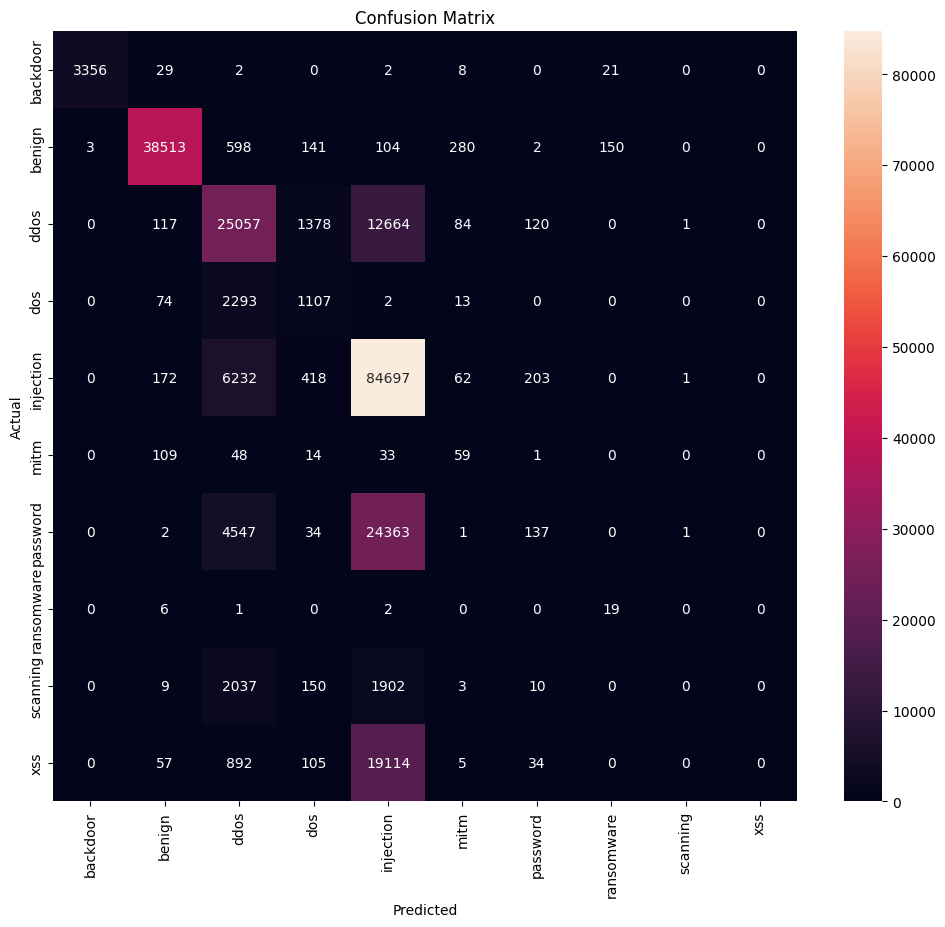


🚀 Trial 7/30:
Model: DeeperNetworkAnomalyDetector, Epochs: 20, Batch Size: 256, LR: 0.0001
number of classes: 10, Classes: [0 1 2 3 4 5 6 7 8 9]
Loss function: Cross Entropy Loss
Epoch 1/20, Loss: 1.1729
Epoch 5/20, Loss: 0.9094
Epoch 10/20, Loss: 0.8887
Epoch 15/20, Loss: 0.8737
Epoch 20/20, Loss: 0.8618

Test Accuracy: 64.39%

Classification Report:
              precision    recall  f1-score   support

    backdoor       0.99      0.98      0.99      3418
      benign       0.99      0.91      0.95     39791
        ddos       0.63      0.59      0.61     39421
         dos       0.24      0.55      0.34      3489
   injection       0.59      0.92      0.72     91785
        mitm       0.02      0.30      0.03       264
    password       0.25      0.00      0.00     29085
  ransomware       0.10      0.68      0.17        28
    scanning       0.00      0.00      0.00      4111
         xss       0.00      0.00      0.00     20207

    accuracy                           0.64    23

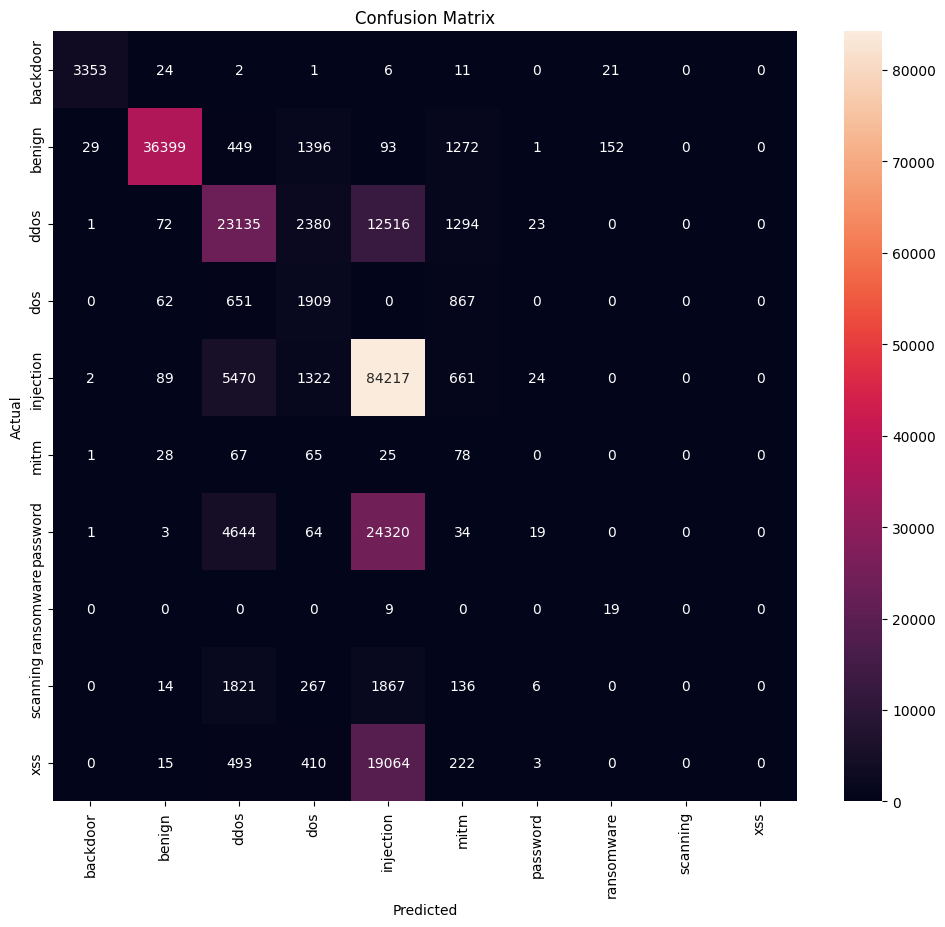


🚀 Trial 8/30:
Model: WiderDeeperNetworkAnomalyDetector, Epochs: 20, Batch Size: 128, LR: 5e-05
number of classes: 10, Classes: [0 1 2 3 4 5 6 7 8 9]
Loss function: Cross Entropy Loss
Epoch 1/20, Loss: 1.1230
Epoch 5/20, Loss: 0.9162
Epoch 10/20, Loss: 0.8932
Epoch 15/20, Loss: 0.8800
Epoch 20/20, Loss: 0.8703

Test Accuracy: 62.24%

Classification Report:
              precision    recall  f1-score   support

    backdoor       0.48      0.98      0.64      3418
      benign       0.83      0.95      0.88     39791
        ddos       0.59      0.59      0.59     39421
         dos       0.00      0.00      0.00      3489
   injection       0.60      0.87      0.71     91785
        mitm       0.01      0.19      0.02       264
    password       0.00      0.00      0.00     29085
  ransomware       0.11      0.82      0.20        28
    scanning       0.00      0.00      0.00      4111
         xss       0.00      0.00      0.00     20207

    accuracy                           0.62  

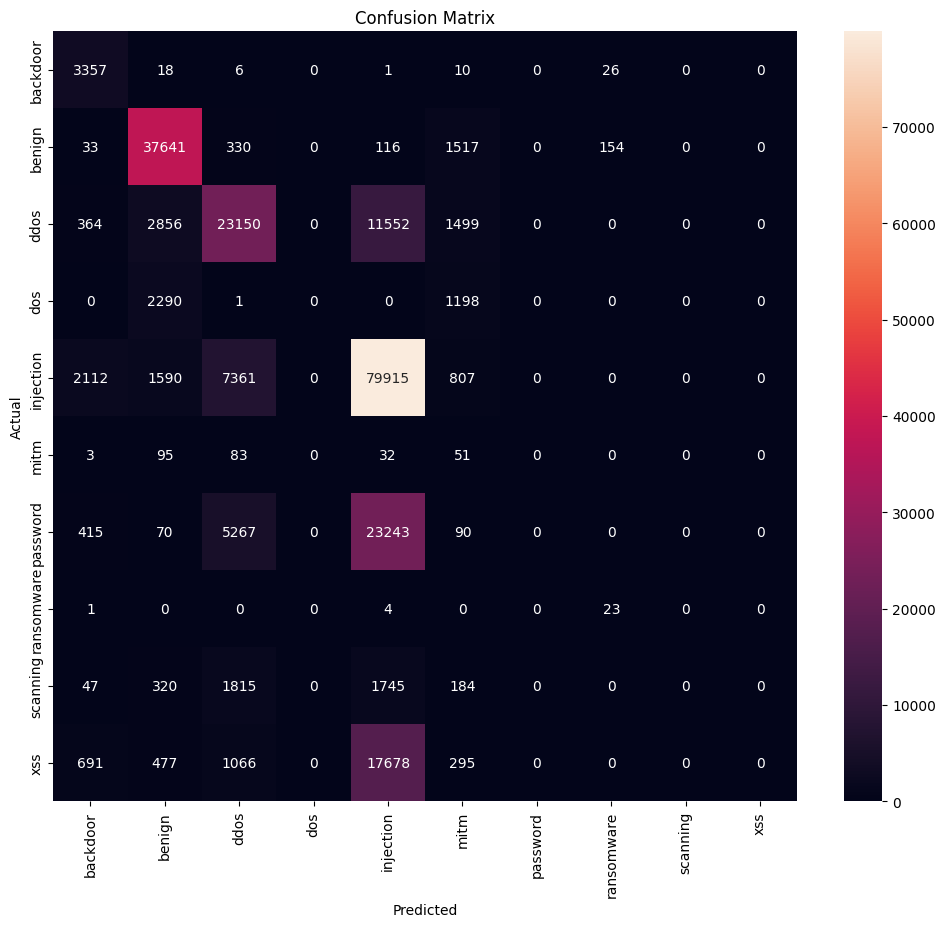


🚀 Trial 9/30:
Model: WiderDeeperNetworkAnomalyDetector, Epochs: 100, Batch Size: 32, LR: 5e-05
number of classes: 10, Classes: [0 1 2 3 4 5 6 7 8 9]
Loss function: Cross Entropy Loss
Epoch 1/100, Loss: 1.0469
Epoch 5/100, Loss: 0.9028
Epoch 10/100, Loss: 0.8802
Epoch 15/100, Loss: 0.8644
Epoch 20/100, Loss: 0.8522
Epoch 25/100, Loss: 0.8437
Epoch 30/100, Loss: 0.8378
Epoch 35/100, Loss: 0.8334
Epoch 40/100, Loss: 0.8299
Epoch 45/100, Loss: 0.8253
Epoch 50/100, Loss: 0.8212
Epoch 55/100, Loss: 0.8191
Epoch 60/100, Loss: 0.8171
Epoch 65/100, Loss: 0.8156
Epoch 70/100, Loss: 0.8137
Epoch 75/100, Loss: 0.8130
Epoch 80/100, Loss: 0.8121
Epoch 85/100, Loss: 0.8106
Epoch 90/100, Loss: 0.8099
Epoch 95/100, Loss: 0.8091
Epoch 100/100, Loss: 0.8083

Test Accuracy: 62.24%

Classification Report:
              precision    recall  f1-score   support

    backdoor       0.98      0.98      0.98      3418
      benign       0.86      0.93      0.90     39791
        ddos       0.56      0.59      0

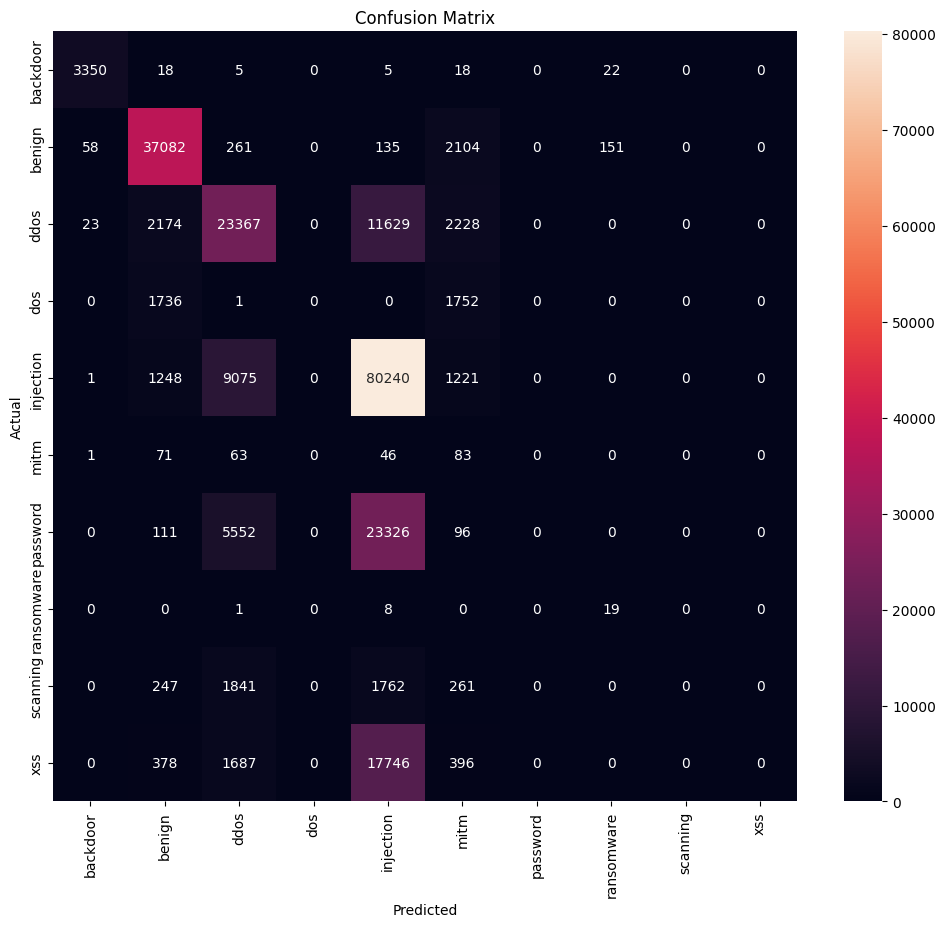


🚀 Trial 10/30:
Model: WiderDeeperNetworkAnomalyDetector, Epochs: 50, Batch Size: 64, LR: 0.0001
number of classes: 10, Classes: [0 1 2 3 4 5 6 7 8 9]
Loss function: Cross Entropy Loss
Epoch 1/50, Loss: 1.0072
Epoch 5/50, Loss: 0.8914
Epoch 10/50, Loss: 0.8630
Epoch 15/50, Loss: 0.8471
Epoch 20/50, Loss: 0.8344
Epoch 25/50, Loss: 0.8265
Epoch 30/50, Loss: 0.8208
Epoch 35/50, Loss: 0.8157
Epoch 40/50, Loss: 0.8132
Epoch 45/50, Loss: 0.8108
Epoch 50/50, Loss: 0.8077

Test Accuracy: 62.59%

Classification Report:
              precision    recall  f1-score   support

    backdoor       0.93      0.98      0.96      3418
      benign       0.82      0.95      0.88     39791
        ddos       0.56      0.59      0.58     39421
         dos       0.00      0.00      0.00      3489
   injection       0.60      0.87      0.71     91785
        mitm       0.01      0.25      0.03       264
    password       0.00      0.00      0.00     29085
  ransomware       0.10      0.68      0.17        

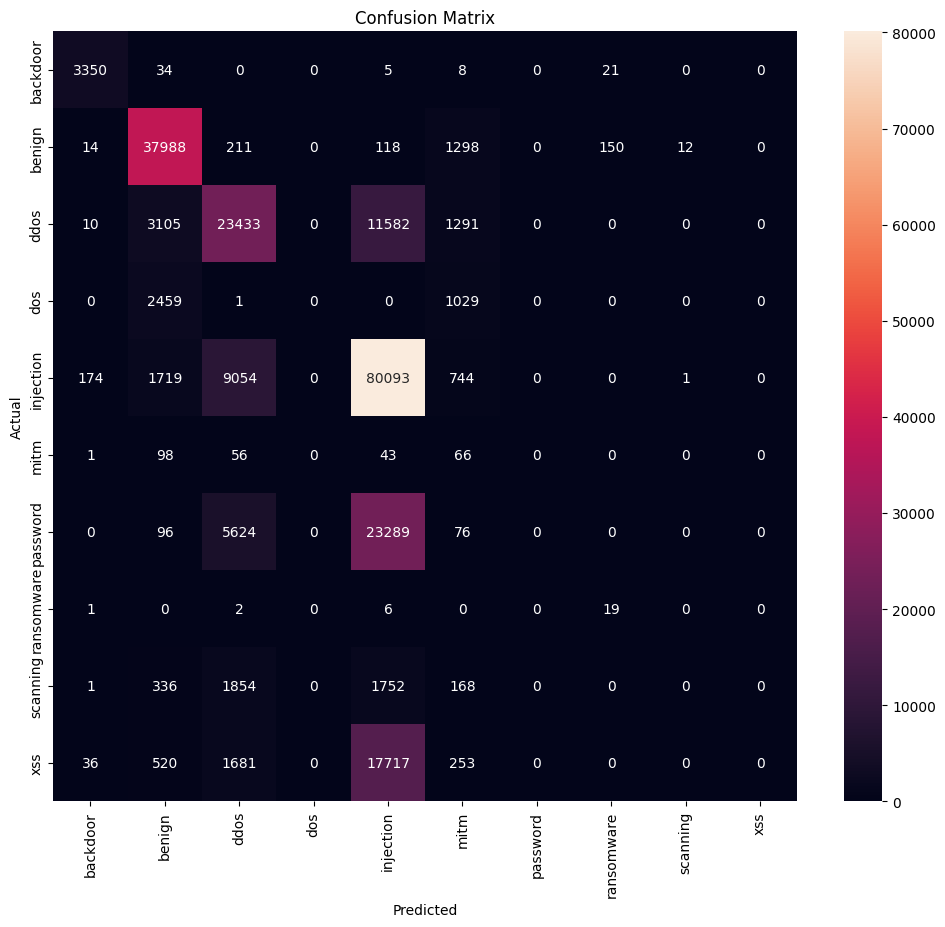


🚀 Trial 11/30:
Model: NetworkAnomalyDetector, Epochs: 30, Batch Size: 256, LR: 0.003
number of classes: 10, Classes: [0 1 2 3 4 5 6 7 8 9]
Loss function: Cross Entropy Loss
Epoch 1/30, Loss: 0.9368
Epoch 5/30, Loss: 0.8353
Epoch 10/30, Loss: 0.8120
Epoch 15/30, Loss: 0.7957
Epoch 20/30, Loss: 0.7871
Epoch 25/30, Loss: 0.7805
Epoch 30/30, Loss: 0.7770

Test Accuracy: 67.22%

Classification Report:
              precision    recall  f1-score   support

    backdoor       1.00      0.98      0.99      3418
      benign       0.99      0.96      0.97     39791
        ddos       0.70      0.62      0.66     39421
         dos       0.38      0.25      0.31      3489
   injection       0.59      0.96      0.73     91785
        mitm       0.09      0.23      0.13       264
    password       0.35      0.02      0.03     29085
  ransomware       0.11      0.68      0.18        28
    scanning       0.19      0.04      0.06      4111
         xss       0.00      0.00      0.00     20207

   

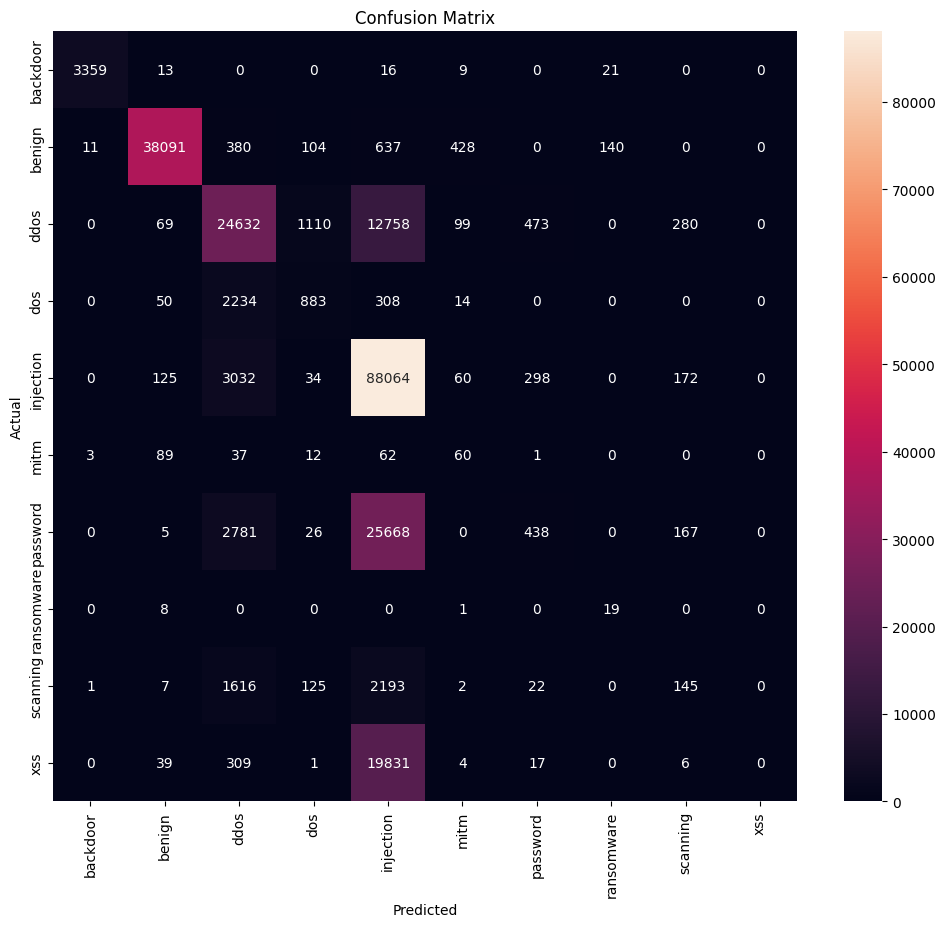


🚀 Trial 12/30:
Model: DeeperNetworkAnomalyDetector, Epochs: 20, Batch Size: 128, LR: 0.0001
number of classes: 10, Classes: [0 1 2 3 4 5 6 7 8 9]
Loss function: Cross Entropy Loss
Epoch 1/20, Loss: 1.0935
Epoch 5/20, Loss: 0.8991
Epoch 10/20, Loss: 0.8754
Epoch 15/20, Loss: 0.8637
Epoch 20/20, Loss: 0.8532

Test Accuracy: 64.93%

Classification Report:
              precision    recall  f1-score   support

    backdoor       1.00      0.98      0.99      3418
      benign       0.99      0.91      0.95     39791
        ddos       0.58      0.64      0.61     39421
         dos       0.26      0.40      0.31      3489
   injection       0.59      0.91      0.72     91785
        mitm       0.05      0.14      0.07       264
    password       0.26      0.00      0.01     29085
  ransomware       0.12      0.89      0.21        28
    scanning       0.00      0.00      0.00      4111
         xss       0.00      0.00      0.00     20207

    accuracy                           0.65    2

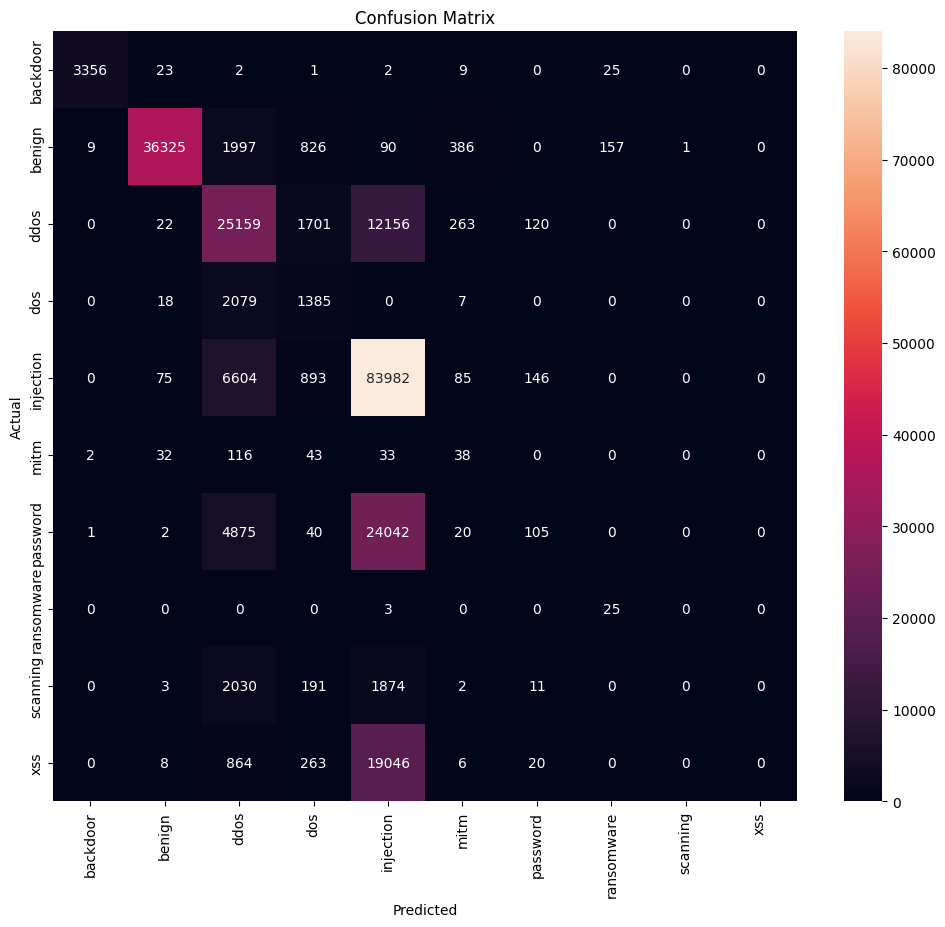


🚀 Trial 13/30:
Model: DeeperNetworkAnomalyDetector, Epochs: 30, Batch Size: 128, LR: 0.001
number of classes: 10, Classes: [0 1 2 3 4 5 6 7 8 9]
Loss function: Cross Entropy Loss
Epoch 1/30, Loss: 0.9284
Epoch 5/30, Loss: 0.8256
Epoch 10/30, Loss: 0.7935
Epoch 15/30, Loss: 0.7750
Epoch 20/30, Loss: 0.7653
Epoch 25/30, Loss: 0.7593
Epoch 30/30, Loss: 0.7537

Test Accuracy: 67.77%

Classification Report:
              precision    recall  f1-score   support

    backdoor       1.00      0.99      0.99      3418
      benign       0.99      0.98      0.98     39791
        ddos       0.65      0.69      0.67     39421
         dos       0.39      0.26      0.31      3489
   injection       0.60      0.94      0.73     91785
        mitm       0.16      0.21      0.18       264
    password       0.29      0.00      0.00     29085
  ransomware       0.12      0.79      0.22        28
    scanning       0.20      0.04      0.07      4111
         xss       0.00      0.00      0.00     2020

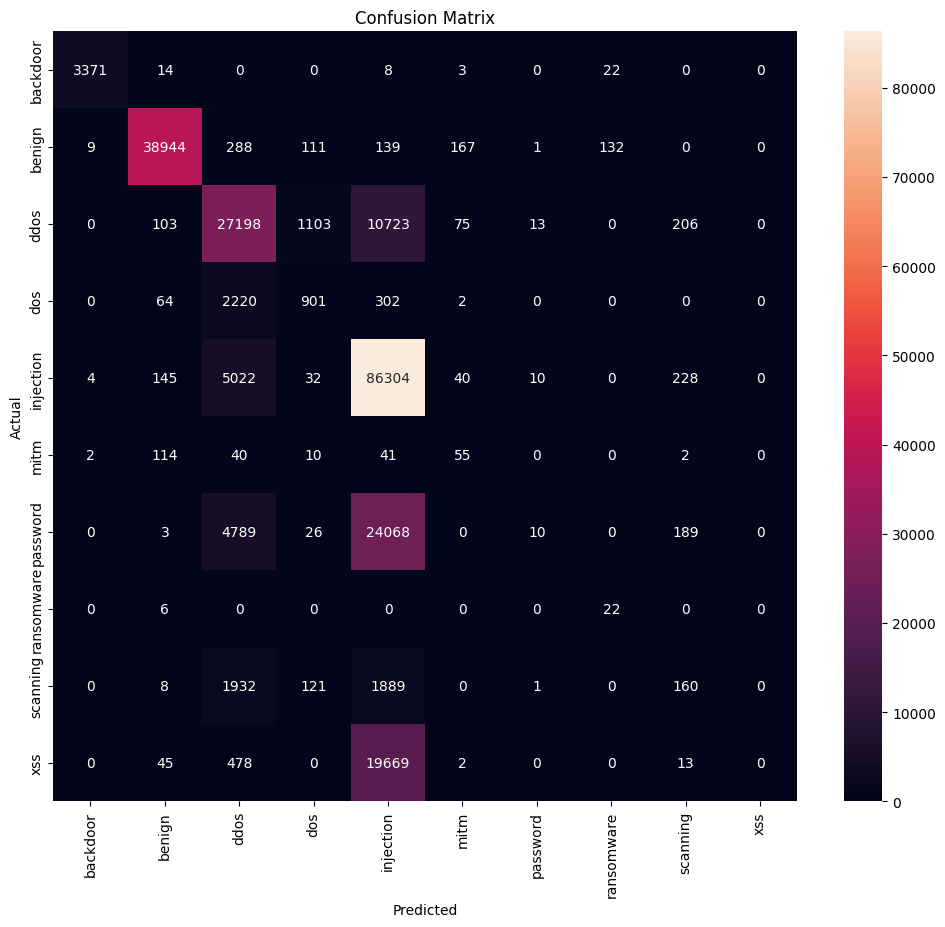


🚀 Trial 14/30:
Model: WiderDeeperNetworkAnomalyDetector, Epochs: 30, Batch Size: 32, LR: 0.003
number of classes: 10, Classes: [0 1 2 3 4 5 6 7 8 9]
Loss function: Cross Entropy Loss
Epoch 1/30, Loss: 0.9285
Epoch 5/30, Loss: 0.8669
Epoch 10/30, Loss: 0.8458
Epoch 15/30, Loss: 0.8358
Epoch 20/30, Loss: 0.8303
Epoch 25/30, Loss: 0.8261
Epoch 30/30, Loss: 0.8224

Test Accuracy: 63.47%

Classification Report:
              precision    recall  f1-score   support

    backdoor       0.98      0.98      0.98      3418
      benign       0.83      0.95      0.89     39791
        ddos       0.70      0.52      0.60     39421
         dos       0.00      0.00      0.00      3489
   injection       0.58      0.93      0.71     91785
        mitm       0.01      0.28      0.02       264
    password       0.08      0.00      0.00     29085
  ransomware       0.10      0.71      0.18        28
    scanning       0.00      0.00      0.00      4111
         xss       0.00      0.00      0.00     

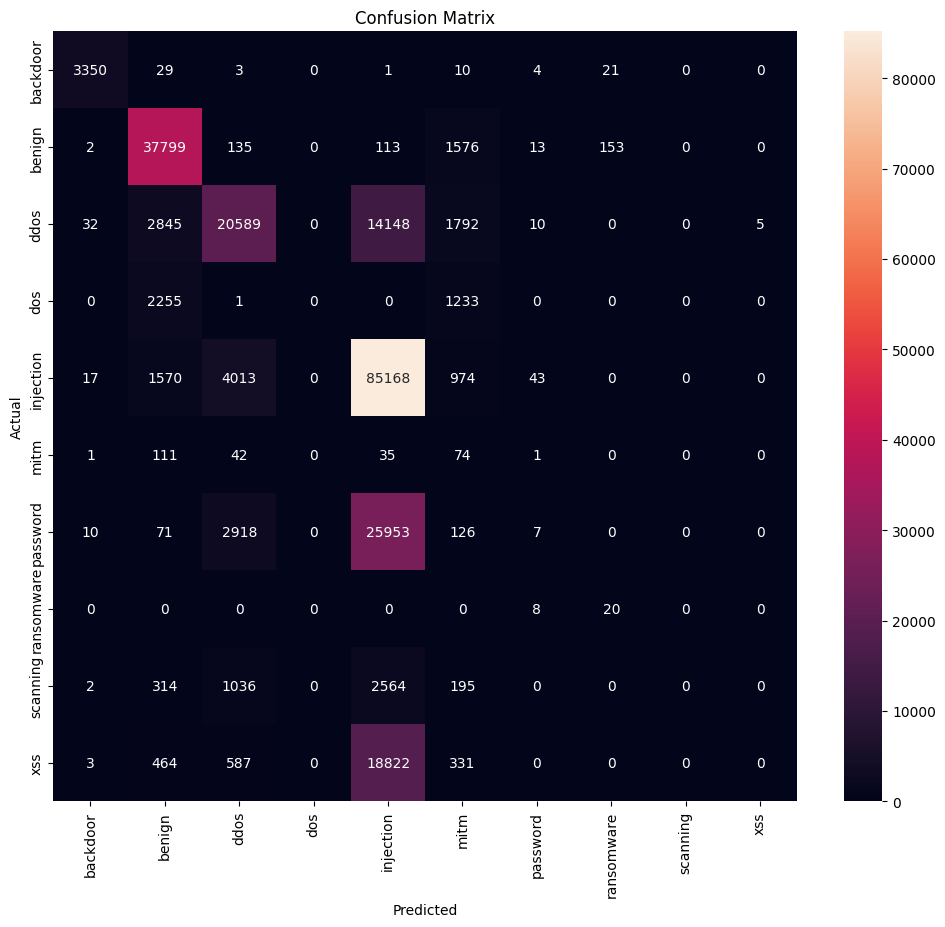


🚀 Trial 15/30:
Model: WiderDeeperNetworkAnomalyDetector, Epochs: 20, Batch Size: 32, LR: 0.003
number of classes: 10, Classes: [0 1 2 3 4 5 6 7 8 9]
Loss function: Cross Entropy Loss
Epoch 1/20, Loss: 0.9287
Epoch 5/20, Loss: 0.8700
Epoch 10/20, Loss: 0.8477
Epoch 15/20, Loss: 0.8386
Epoch 20/20, Loss: 0.8321

Test Accuracy: 61.20%

Classification Report:
              precision    recall  f1-score   support

    backdoor       0.36      0.98      0.53      3418
      benign       0.82      0.95      0.88     39791
        ddos       0.56      0.59      0.58     39421
         dos       0.00      0.00      0.00      3489
   injection       0.60      0.84      0.70     91785
        mitm       0.01      0.27      0.02       264
    password       0.00      0.00      0.00     29085
  ransomware       0.10      0.68      0.17        28
    scanning       0.00      0.00      0.00      4111
         xss       0.00      0.00      0.00     20207

    accuracy                           0.61  

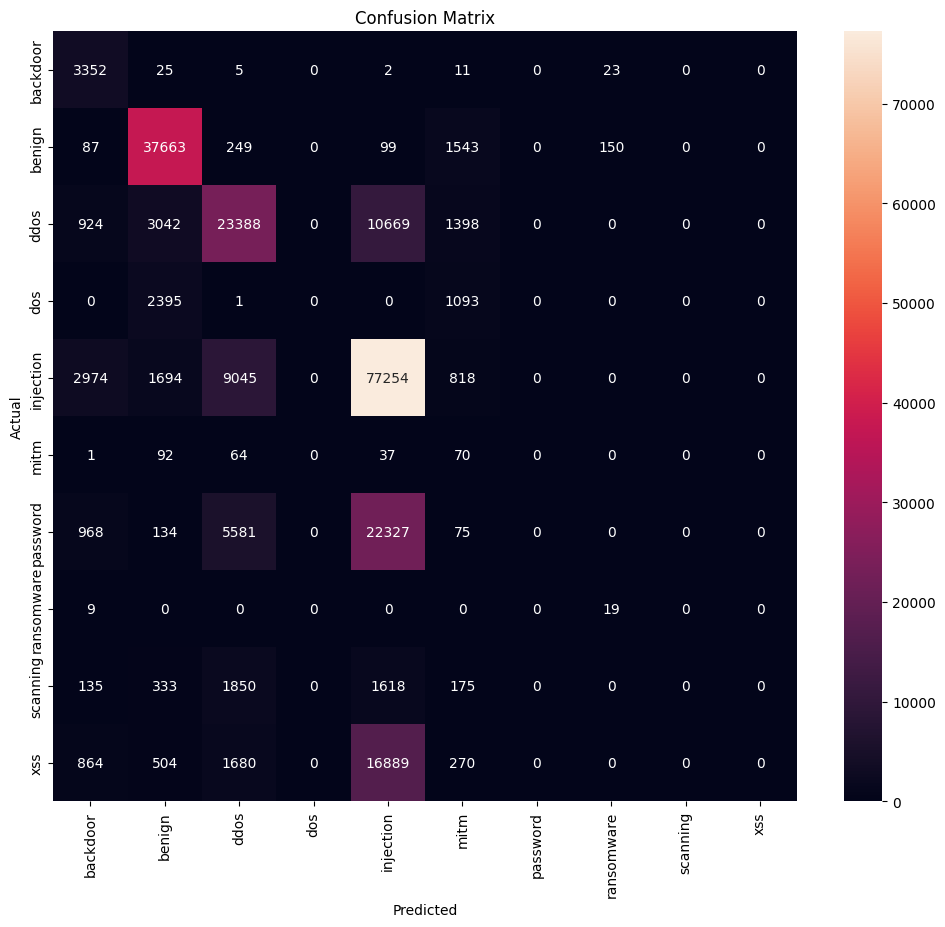


🚀 Trial 16/30:
Model: DeeperNetworkAnomalyDetector, Epochs: 50, Batch Size: 64, LR: 0.001
number of classes: 10, Classes: [0 1 2 3 4 5 6 7 8 9]
Loss function: Cross Entropy Loss
Epoch 1/50, Loss: 0.9085
Epoch 5/50, Loss: 0.8063
Epoch 10/50, Loss: 0.7801
Epoch 15/50, Loss: 0.7691
Epoch 20/50, Loss: 0.7630
Epoch 25/50, Loss: 0.7574
Epoch 30/50, Loss: 0.7545
Epoch 35/50, Loss: 0.7495
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/dthm3/netsec/netsec-project-spring2025/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_41423/2260294405.py", line 2, in <module>
    random_search_training(
  File "/home/dthm3/netsec/netsec-project-spring2025/gan_ids_project/src/ids/train_ids.py", line 103, in random_search_training
  File "/home/dthm3/netsec/netsec-project-spring2025/gan_ids_project/src/utils/utils.py", line 157, in train_and_evaluate_model
    optimizer.step()
  File "/home/dthm3/netsec/netsec-project-spring2025/.venv/lib/python3.9/site-packages/torch/optim/optimizer.py", line 485, in wrapper
    out = func(*args, **kwargs)
  File "/home/dthm3/netsec/netsec-project-spring2025/.venv/lib/python3.9/site-packages/torch/optim/optimizer.py", line 79, in _use_grad
    ret = func(self, *args, **kwargs)
  File "/home/dthm3/netsec/netsec-project-spring2025/.v

In [ ]:
# from src.ids.train_ids import random_search_training
# random_search_training(
#     x_real=f"../data/processed/{cur_dataset}/X_train.csv",
#     y_real=f"../data/processed/{cur_dataset}/y_train.csv",
#     synthetic_path=f"../data/synthetic/{cur_dataset}/synthetic_data.csv",
#     x_test=f"../data/processed/{cur_dataset}/X_test.csv",
#     y_test=f"../data/processed/{cur_dataset}/y_test.csv",
#     results_dir=f"../experiments/results/{cur_dataset}/results/deeper/",
#     n_trials=30
# )